In [56]:
import pandas as pd
import numpy as np

df = pd.read_excel('timvarden-2021-01-12.xls', skiprows=4, converters= {'2021': pd.to_datetime})

#df.head()
df.keys()

Index(['2021', 'Timmätt förbrexkl. avk.lastSE1MWh',
       'Timmätt förbrexkl. avk.lastSE2MWh',
       'Timmätt förbrexkl. avk.lastSE3MWh',
       'Timmätt förbrexkl. avk.lastSE4MWh', 'Timmätt förbr>50 MWSE1MWh',
       'Timmätt förbr>50 MWSE2MWh', 'Timmätt förbr>50 MWSE3MWh',
       'Timmätt förbr>50 MWSE4MWh', 'Avkopplingsb.lastSE1MWh',
       'Avkopplingsb.lastSE2MWh', 'Avkopplingsb.lastSE3MWh',
       'Avkopplingsb.lastSE4MWh', 'TimmättaförlusterSE1MWh',
       'TimmättaförlusterSE2MWh', 'TimmättaförlusterSE3MWh',
       'TimmättaförlusterSE4MWh', 'Ospec. produktionSE1MWh',
       'Ospec. produktionSE2MWh', 'Ospec. produktionSE3MWh',
       'Ospec. produktionSE4MWh', 'Vattenkraft produktionSE1MWh',
       'Vattenkraft produktionSE2MWh', 'Vattenkraft produktionSE3MWh',
       'Vattenkraft produktionSE4MWh', 'VindkraftproduktionSE1MWh',
       'VindkraftproduktionSE2MWh', 'VindkraftproduktionSE3MWh',
       'VindkraftproduktionSE4MWh', 'KärnkraftproduktionSE3MWh',
       'Värmekraftp

In [57]:
#sol
df['SolkraftproduktionTotMWh'] = df['SolkraftproduktionSE4MWh'] + df['SolkraftproduktionSE3MWh'] + \
    df['SolkraftproduktionSE2MWh'] + df['SolkraftproduktionSE1MWh']

df['SolkraftproduktionTotGWh'] = df['SolkraftproduktionTotMWh'] / 1e3

#vind
df['VindkraftproduktionTotMWh'] = df['VindkraftproduktionSE1MWh'] + df['VindkraftproduktionSE2MWh'] + \
    df['VindkraftproduktionSE3MWh'] + df['VindkraftproduktionSE4MWh']

df['VindkraftproduktionTotGWh'] = df['VindkraftproduktionTotMWh'] / 1e3

#vatten
df['Vattenkraft produktionTotMWh'] = df['Vattenkraft produktionSE1MWh'] + df['Vattenkraft produktionSE2MWh'] + \
    df['Vattenkraft produktionSE3MWh'] + df['Vattenkraft produktionSE4MWh']

df['Vattenkraft produktionTotGWh'] = df['Vattenkraft produktionTotMWh'] / 1e3

#värme
df['VärmekraftproduktionTotMWh'] = df['VärmekraftproduktionSE1MWh'] + df['VärmekraftproduktionSE2MWh'] + \
    df['VärmekraftproduktionSE3MWh'] + df['VärmekraftproduktionSE4MWh']

df['VärmekraftproduktionTotGWh'] = df['VärmekraftproduktionTotMWh'] / 1e3

#kärn
df['KärnkraftproduktionTotMWh'] = df['KärnkraftproduktionSE3MWh']

df['KärnkraftproduktionTotGWh'] = df['KärnkraftproduktionTotMWh'] / 1e3

#ospec
df['OspecproduktionTotMWh'] = df['Ospec. produktionSE1MWh'] + df['Ospec. produktionSE2MWh'] + \
    df['Ospec. produktionSE3MWh'] + df['Ospec. produktionSE4MWh']

df['OspecproduktionTotGWh'] = df['OspecproduktionTotMWh'] / 1e3




In [58]:
#fix time

df['time'] = df['2021']
df['angles'] = np.linspace(0, np.pi*2, len(df['2021']))
df['xticks'] = np.linspace(1, 13, len(df['2021']))
df.head()

,2021,Timmätt förbrexkl. avk.lastSE1MWh,Timmätt förbrexkl. avk.lastSE2MWh,Timmätt förbrexkl. avk.lastSE3MWh,Timmätt förbrexkl. avk.lastSE4MWh,Timmätt förbr>50 MWSE1MWh,Timmätt förbr>50 MWSE2MWh,Timmätt förbr>50 MWSE3MWh,Timmätt förbr>50 MWSE4MWh,Avkopplingsb.lastSE1MWh,...,Vattenkraft produktionTotGWh,VärmekraftproduktionTotMWh,VärmekraftproduktionTotGWh,KärnkraftproduktionTotMWh,KärnkraftproduktionTotGWh,OspecproduktionTotMWh,OspecproduktionTotGWh,time,angles,xticks
0,2021-01-01 00:00:00,-617.308343,-522.589174,-4232.448868,-1060.265758,-167.986568,-548.179199,-588.475962,-3.373800,-1.040080,...,10.697545,1105.686050,1.105686,6726.50,6.72650,29.912795,0.029913,2021-01-01 00:00:00,0.000000,1.00000
1,2021-01-01 01:00:00,-627.778187,-497.182573,-4222.276545,-1052.641770,-167.266918,-558.712601,-587.852744,-3.452400,-1.017013,...,10.474112,1071.201318,1.071201,6729.10,6.72910,30.036172,0.030036,2021-01-01 01:00:00,0.000717,1.00137
2,2021-01-01 02:00:00,-630.691519,-490.763213,-4227.138128,-1044.005800,-170.222800,-560.020600,-570.800748,-3.396000,-1.077333,...,10.410790,1055.977769,1.055978,6728.16,6.72816,30.265464,0.030265,2021-01-01 02:00:00,0.001435,1.00274
3,2021-01-01 03:00:00,-627.771419,-500.155991,-4211.540578,-1045.569056,-168.621640,-560.984199,-562.362661,-3.378600,-1.058449,...,10.386807,1053.614573,1.053615,6728.36,6.72836,30.681982,0.030682,2021-01-01 03:00:00,0.002152,1.00411
4,2021-01-01 04:00:00,-631.240238,-509.870820,-4247.722087,-1055.394647,-170.829070,-557.875401,-560.135292,-3.427199,-1.696037,...,10.348525,1063.099292,1.063099,6728.19,6.72819,30.302306,0.030302,2021-01-01 04:00:00,0.002869,1.00548


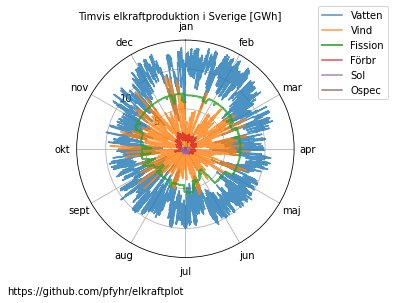

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

plt.plot(df['angles'], df['Vattenkraft produktionTotGWh'], label='Vatten', alpha=0.8)
plt.plot(df['angles'], df['VindkraftproduktionTotGWh'], label='Vind', alpha=0.8)
plt.plot(df['angles'], df['KärnkraftproduktionTotGWh'], label='Fission', alpha=0.8, linewidth=2)
plt.plot(df['angles'], df['VärmekraftproduktionTotGWh'], label='Förbr', alpha=0.8)
plt.plot(df['angles'], df['SolkraftproduktionTotGWh'], label='Sol', alpha=0.8)
plt.plot(df['angles'], df['OspecproduktionTotGWh'], label='Ospec', alpha=0.8)

#radialtick
ax.set_rticks([0, 5, 10])
ax.set_rlabel_position(-55)  # Move radial labels away from plotted line

#thetatick
#ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/2.0))
#ax.set_xticklabels(['jan', 'apr', 'jul','okt'])

#thetatick varje månad
ax.set_xticks(np.arange(0,2.0*np.pi,2*np.pi/12.))
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sept', 'okt', 'nov', 'dec'])

angle = np.deg2rad(12)
ax.legend(loc="lower left",
          bbox_to_anchor=(.6 + np.cos(angle)/2, .6 + np.sin(angle)/2))

#titel och annot
fig.suptitle('Timvis elkraftproduktion i Sverige [GWh]', fontsize=10)

plt.text(0.1, -0.001, 'https://github.com/pfyhr/elkraftplot', fontsize=10, transform=plt.gcf().transFigure)

plt.savefig("kraftsystem_pol.png", dpi=600, bbox_inches='tight')
plt.show()

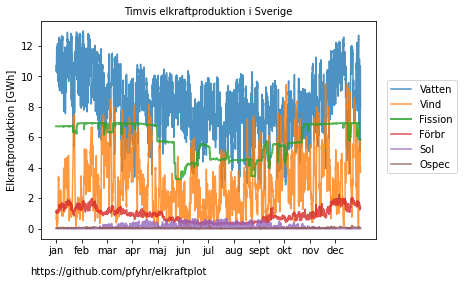

In [60]:
#vanlig plot

fig, ax = plt.subplots()


plt.plot(df['xticks'], df['Vattenkraft produktionTotGWh'], label='Vatten', alpha=0.8)
plt.plot(df['xticks'], df['VindkraftproduktionTotGWh'], label='Vind', alpha=0.8)
plt.plot(df['xticks'], df['KärnkraftproduktionTotGWh'], label='Fission', alpha=0.8, linewidth=2)
plt.plot(df['xticks'], df['VärmekraftproduktionTotGWh'], label='Förbr', alpha=0.8)
plt.plot(df['xticks'], df['SolkraftproduktionTotGWh'], label='Sol', alpha=0.8)
plt.plot(df['xticks'], df['OspecproduktionTotGWh'], label='Ospec', alpha=0.8)

ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sept', 'okt', 'nov', 'dec'])
plt.title('Timvis elkraftproduktion i Sverige', fontsize=10)
ax.legend(bbox_to_anchor=(1.02, 0.75))
ax.set_ylabel('Elkraftproduktion [GWh]')

plt.text(0.1, -0.001, 'https://github.com/pfyhr/elkraftplot', fontsize=10, transform=plt.gcf().transFigure)



plt.savefig("kraftsystem_norm.png", dpi=600, bbox_inches='tight')
plt.show()

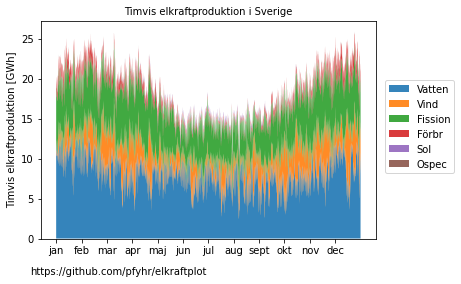

In [61]:
fig, ax = plt.subplots()

labels = ['Vatten', 'Vind', 'Fission', 'Förbr', 'Sol', 'Ospec']
plt.stackplot(df['xticks'], df['Vattenkraft produktionTotGWh'], \
                df['VindkraftproduktionTotGWh'], df['KärnkraftproduktionTotGWh'], \
                df['VärmekraftproduktionTotGWh'], df['SolkraftproduktionTotGWh'], \
                df['OspecproduktionTotGWh'], labels=labels, alpha=0.9)

ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sept', 'okt', 'nov', 'dec'])
plt.title('Timvis elkraftproduktion i Sverige', fontsize=10)
ax.legend(bbox_to_anchor=(1.25, 0.75))
ax.set_ylabel('Timvis elkraftproduktion [GWh]')

plt.text(0.1, -0.001, 'https://github.com/pfyhr/elkraftplot', fontsize=10, transform=plt.gcf().transFigure)

plt.savefig("kraftsystem_stack.png", dpi=600, bbox_inches='tight')
plt.show()

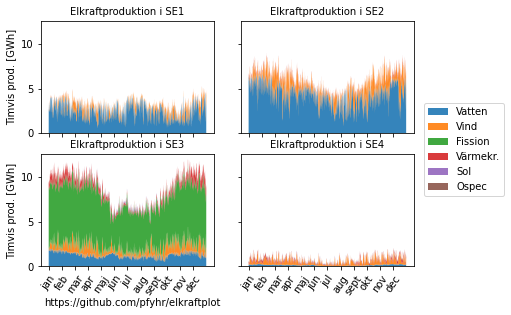

In [86]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
plt.tight_layout()

labels = ['Vatten', 'Vind', 'Fission', 'Värmekr.', 'Sol', 'Ospec']

for SE in [1, 2, 3, 4]:
    if SE == 1:
        row = 0
        col = 0
    elif SE == 2:
        row = 0
        col = 1
    elif SE == 3:
        row = 1
        col = 0
    else:
        row = 1
        col = 1
    
    if SE == 3:
        axs[row,col].stackplot(df['xticks'], df[f'Vattenkraft produktionSE{SE}MWh']/1e3, \
                df[f'VindkraftproduktionSE{SE}MWh']/1e3, df[f'KärnkraftproduktionSE{SE}MWh']/1e3, \
                df[f'VärmekraftproduktionSE{SE}MWh']/1e3, df[f'SolkraftproduktionSE{SE}MWh']/1e3, \
                df[f'Ospec. produktionSE{SE}MWh']/1e3, labels=labels, alpha=0.9)
    else:
        axs[row,col].stackplot(df['xticks'], df[f'Vattenkraft produktionSE{SE}MWh']/1e3, \
                df[f'VindkraftproduktionSE{SE}MWh']/1e3, df['KärnkraftproduktionSE3MWh']*0/1e3, \
                df[f'VärmekraftproduktionSE{SE}MWh']/1e3, df[f'SolkraftproduktionSE{SE}MWh']/1e3, \
                df[f'Ospec. produktionSE{SE}MWh']/1e3, labels=labels, alpha=0.9)
        
        
    if row == 1:
        axs[row,col].set_xticks(np.arange(1,13,1))
        axs[row,col].set_xticklabels( \
         ['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sept', 'okt', 'nov', 'dec'] \
         , rotation = 55)
    
    if col == 0:
        axs[row,col].set_ylabel('Timvis prod. [GWh]')
    axs[row,col].set_title(f'Elkraftproduktion i SE{SE}', fontsize=10)
    
#add the legend
axs[row,col].legend(bbox_to_anchor=(1.55, 1.5))

#grab the yscale for the next plot
ylims = axs[row,col].get_ylim()

plt.text(0.1, -0.04, 'https://github.com/pfyhr/elkraftplot', fontsize=10, transform=plt.gcf().transFigure)
plt.savefig("kraftsystem_stack_SEs.png", dpi=600, bbox_inches='tight')
plt.show()

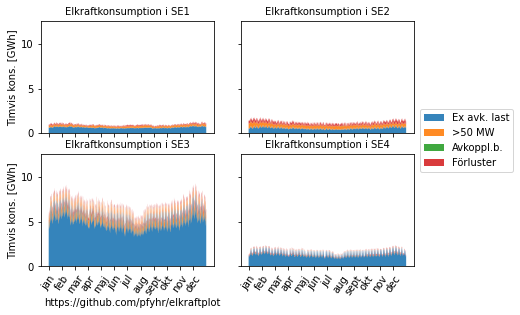

In [88]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
plt.tight_layout()

labels = ['Ex avk. last', '>50 MW', 'Avkoppl.b.', 'Förluster']

for SE in [1, 2, 3, 4]:
    if SE == 1:
        row = 0
        col = 0
    elif SE == 2:
        row = 0
        col = 1
    elif SE == 3:
        row = 1
        col = 0
    else:
        row = 1
        col = 1
    
    
    axs[row,col].stackplot(df['xticks'], -df[f'Timmätt förbrexkl. avk.lastSE{SE}MWh']/1e3, \
        -df[f'Timmätt förbr>50 MWSE{SE}MWh']/1e3, -df[f'Avkopplingsb.lastSE{SE}MWh']/1e3, \
        -df[f'TimmättaförlusterSE{SE}MWh']/1e3, labels=labels, alpha=0.9)
    
    if row == 1:
        axs[row,col].set_xticks(np.arange(1,13,1))
        axs[row,col].set_xticklabels( \
         ['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sept', 'okt', 'nov', 'dec'] \
         , rotation = 55)
    if col == 0:
        axs[row,col].set_ylabel('Timvis kons. [GWh]')    
    axs[row,col].set_title(f'Elkraftkonsumption i SE{SE}', fontsize=10)


axs[row,col].set_ylim(ylims)

#add the legend
axs[row,col].legend(bbox_to_anchor=(1.60, 1.45))

plt.text(0.1, -0.04, 'https://github.com/pfyhr/elkraftplot', fontsize=10, transform=plt.gcf().transFigure)
plt.savefig("forbrukning_stack_SEs.png", dpi=600, bbox_inches='tight')
plt.show()